Name : Cecilia Ngunjiri
    
Phase 3 Project    

Business Problem and Data





It is up to you to define a stakeholder, a business problem, and you are also responsible for choosing a da

State: The state where the customer is located.
    
Account Length: How long the customer has had their account.
    
Area Code: The area code of the customer’s phone number.
    
Phone Number: The customer's phone number.
    
International Plan: Whether the customer has an international calling plan (yes/no).
    
Voice Mail Plan: Whether the customer has a voicemail plan (yes/no).
    
Number Vmail Messages: The number of voicemail messages.
    
Total Day Minutes, Calls, Charge: Usage and cost information for daytime calls.
    
Total Eve Minutes, Calls, Charge: Usage and cost information for evening calls.
    
Total Night Minutes, Calls, Charge: Usage and cost information for night calls.
    
Total Intl Minutes, Calls, Charge: Usage and cost information for international calls.
    
Customer Service Calls: Number of calls the customer made to customer service.
    
Churn: Whether the customer has stopped using the service (yes/no).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('telecom_churn.csv')
data


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
data.shape

(3333, 21)

In [7]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

MISSING VALUES

In [9]:
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

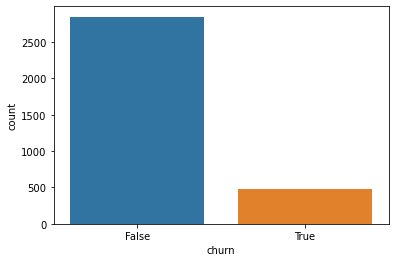

In [10]:
sns.countplot(data=data, x='churn')

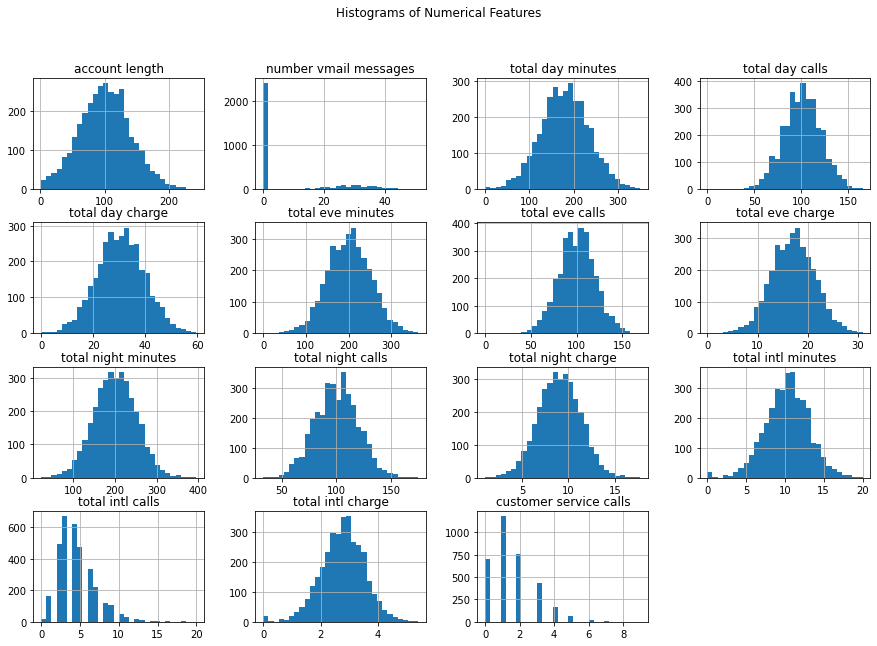

In [11]:
# Plotting distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                       'total night minutes', 'total night calls', 'total night charge', 
                       'total intl minutes', 'total intl calls', 'total intl charge', 
                       'customer service calls']

data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

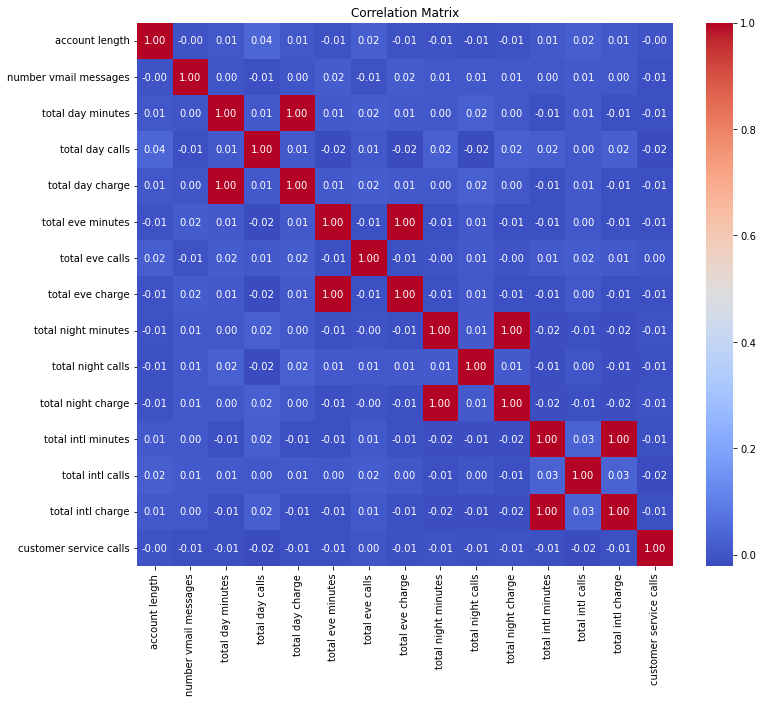

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [13]:
#CATEGORICAL VALUES

data = data.replace(['yes', 'no'], ['1', '0'])
data[['international plan', 'voice mail plan']] = data[['international plan', 'voice mail plan']].astype(int).astype(int)

In [14]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:xlabel='international plan', ylabel='count'>

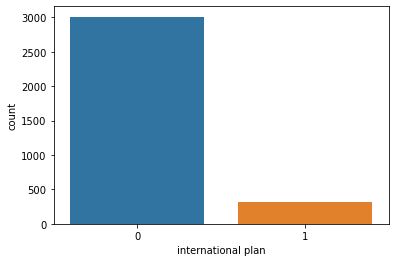

In [15]:
sns.countplot(data=data, x='international plan')

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

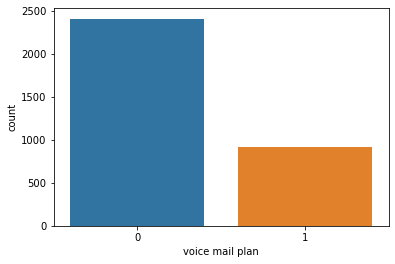

In [16]:
sns.countplot(data=data, x='voice mail plan')

In [17]:
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls'] + data['customer service calls']
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']

print(data['total calls'].describe(), data['total minutes'].describe(), sep='\n\n')

count    3333.00000
mean      306.69997
std        34.44939
min       194.00000
25%       284.00000
50%       307.00000
75%       330.00000
max       418.00000
Name: total calls, dtype: float64

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: total minutes, dtype: float64


In [18]:
calls_by_state = data.groupby('state')['total calls'].sum().sort_values(ascending=False)
minutes_by_state = data.groupby('state')['total minutes'].sum().sort_values(ascending=False)

avg_minutes_by_state = data.groupby('state')['total minutes'].mean().sort_values(ascending=False)
avg_calls_by_state = data.groupby('state')['total calls'].mean().sort_values(ascending=False)
records_by_state = data.groupby('state')['churn'].count().sort_values(ascending=False)

print(avg_minutes_by_state.head())
print(avg_calls_by_state.head())
print(records_by_state.head())

state
IN    619.323944
NJ    611.707353
KS    608.884286
MA    608.644615
TN    606.994340
Name: total minutes, dtype: float64
state
GA    318.351852
FL    315.809524
ND    314.258065
ID    312.931507
NC    312.911765
Name: total calls, dtype: float64
state
WV    106
MN     84
NY     83
AL     80
OR     78
Name: churn, dtype: int64


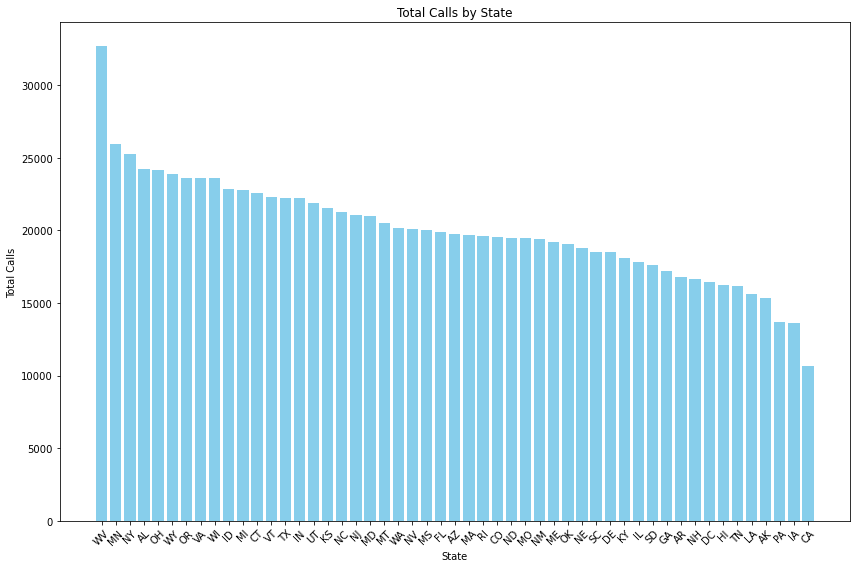

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and the code you provided has been executed

# Grouping and sorting data as per your code
calls_by_state = data.groupby('state')['total calls'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))  # Set figure size (optional)
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Calls by State')  # Title of the graph
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


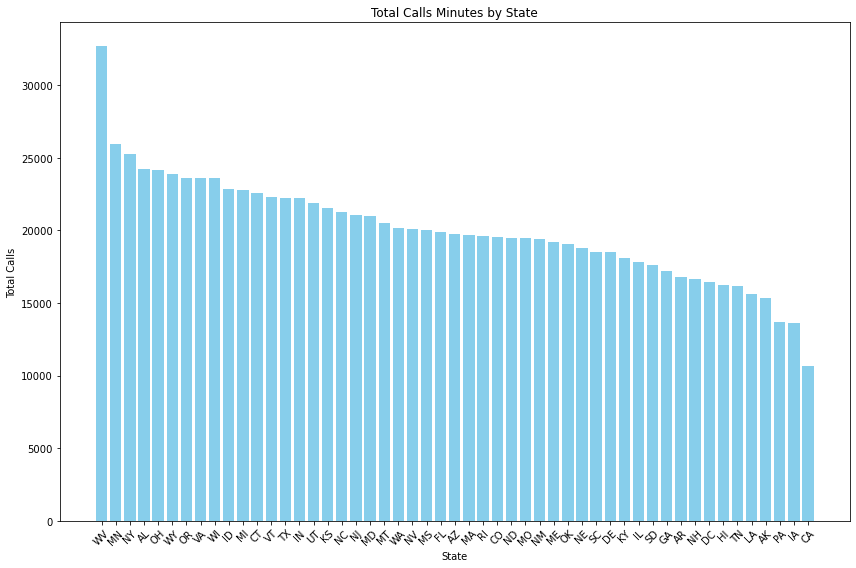

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping and sorting data as per your code
minutes_by_state = data.groupby('state')['total minutes'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))  # Set figure size (optional)
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Calls Minutes by State')  # Title of the graph
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Define features and target variable
X = data.drop('churn', axis=1)
y = data['churn']

# Define numerical and categorical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                       'total night minutes', 'total night calls', 'total night charge', 
                       'total intl minutes', 'total intl calls', 'total intl charge', 
                       'customer service calls']
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan', 'phone number']


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the preprocessor for numerical features
num_preprocessor = StandardScaler()

# Define the preprocessor for categorical features
cat_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the numerical features
X_num = X[numerical_features]
X_num_scaled = num_preprocessor.fit_transform(X_num)

# Fit and transform the categorical features
X_cat = X[categorical_features]
X_cat_encoded = cat_preprocessor.fit_transform(X_cat).toarray()

# Combine the preprocessed features
import numpy as np

X_processed = np.hstack([X_num_scaled, X_cat_encoded])


In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [36]:
# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

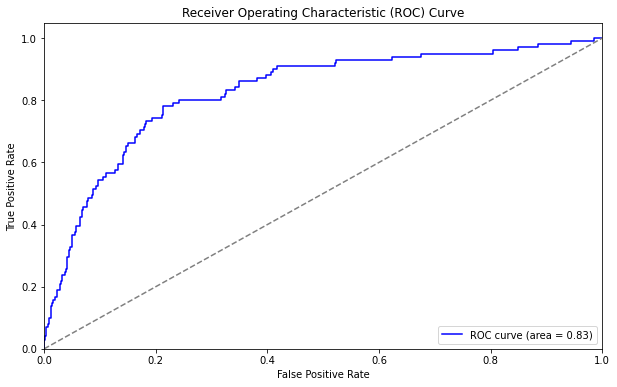

In [37]:
# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store the results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results[name] = {
        'model': model,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }
    
    # Print classification report
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.58      0.19      0.28       101

    accuracy                           0.86       667
   macro avg       0.72      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.91      0.73      0.81       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       566
        True       1.00      0.38      0.55       101

    accuracy                           0.91       667
   macro av

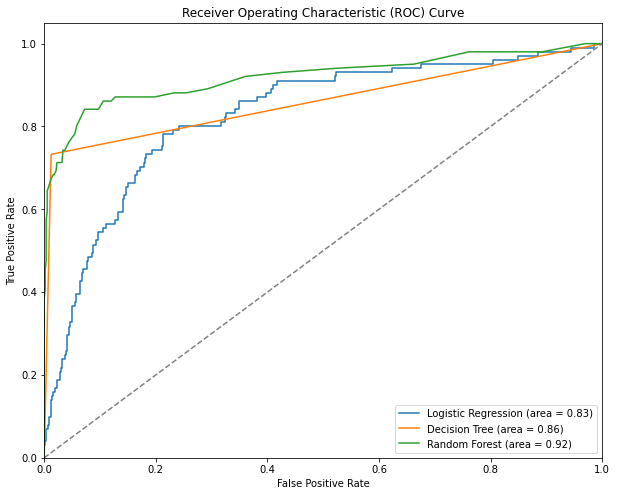

In [39]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (area = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store the results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Predict class labels
    y_pred = model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }
    
    # Print classification report
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Print confusion matrix
    print(f"{name} Confusion Matrix:\n{cm}")



Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.58      0.19      0.28       101

    accuracy                           0.86       667
   macro avg       0.72      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Logistic Regression Confusion Matrix:
[[552  14]
 [ 82  19]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       566
        True       0.89      0.75      0.82       101

    accuracy                           0.95       667
   macro avg       0.93      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667

Decision Tree Confusion Matrix:
[[557   9]
 [ 25  76]]
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       566
    

In [49]:
from sklearn.metrics import accuracy_score

# Dictionary to store metrics
metrics = {}

for name, result in results.items():
    y_pred = result['model'].predict(X_test)
    cm = result['confusion_matrix']
    accuracy = accuracy_score(y_test, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    f1 = 2 * (precision * recall) / (precision + recall)
    
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': result['roc_auc']
    }

# Print metrics
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.856072   0.575758  0.188119  0.283582  0.827607
Decision Tree        0.949025   0.894118  0.752475  0.817204  0.868287
Random Forest        0.890555   1.000000  0.277228  0.434109  0.920617
